In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install pandas-profiling
!{sys.executable} -m pip install pandasql 
from pandasql import sqldf
import pandas_profiling

#######################################################
# Process Clinical data
#######################################################

patient_data = pd.read_csv('patient_data.csv')

patient = patient_data

patient = patient.set_index('track_name').T
patient = patient[1:]
patient = patient.reset_index()
patient = patient.rename(columns = {'index':'ID'})

patient['ID'] = patient['ID'].str.upper()
patient['Diagnosis Age'] = pd.to_numeric(patient['Diagnosis Age'])
patient['Overall Survival (Months)'] = pd.to_numeric(patient['Overall Survival (Months)'])
patient['Mutation Count'] = pd.to_numeric(patient['Mutation Count'])
patient['Sex'] = patient['Sex'].str.lower()
patient = patient[patient['# Samples per Patient']!='2'].reset_index(drop=True)

def label(x):
    if 'T1' in x:
        return 'T1'
    if 'T2' in x:
        return 'T2'
    if 'T3' in x:
        return 'T3'
    return 'T4'
patient['Stage'] = patient['American Joint Committee on Cancer Tumor Stage Code'].apply(lambda x: label(x))

patient = patient.drop(['Profiled in Mutations','Profiled in Putative copy-number alterations from GISTIC','Patient\'s Vital Status','# Samples per Patient','Cancer Type','Informed consent verified','Neoplasm Histologic Type Name'],axis=1)

#######################################################
# Process Tumor mRNA gene expression data
#######################################################

mrna_data = pd.read_csv('mrna_data.txt',sep='\t')

mrna = mrna_data 

mrna.dropna(thresh=1,axis=1,inplace=True)
mrna = mrna.drop(['STUDY_ID'],axis=1)

def remove(x):
    new = x[:len(x)-3]
    new = new.replace("_","")
    return new.upper()
mrna['SAMPLE_ID'] = mrna['SAMPLE_ID'].apply(lambda x: remove(x))

#######################################################
# Process Tumor Mutation Sequencing data
#######################################################

In [ ]:
def pysqldf(q):
    return sqldf(q, globals())

q = '''
SELECT *
FROM patient
JOIN mrna
ON patient.ID = mrna.SAMPLE_ID
'''
df = pysqldf(q)

In [195]:
patient

track_name,ID,American Joint Committee on Cancer Tumor Stage Code,Diagnosis Age,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage
0,CG-A3-3387,T1a,49,20.27,G2,WHITE,LIVING,male,70,T1
1,CG-A3-3374,T1b,51,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1
2,CG-A3-3363,T2,50,10.48,G2,ASIAN,LIVING,male,1392,T2
3,CG-CZ-5460,T3b,55,94.38,G2,WHITE,LIVING,male,52,T3
4,CG-BP-4176,T1b,64,64.22,G2,WHITE,LIVING,male,85,T1
5,CG-CJ-6032,T2,63,119.55,G3,WHITE,LIVING,female,42,T2
6,CG-BP-5192,T1a,59,23.46,G2,WHITE,LIVING,male,46,T1
7,CG-CW-5585,T3b,51,85.71,G2,WHITE,LIVING,male,41,T3
8,CG-B0-5691,T1a,66,112.71,G3,WHITE,LIVING,female,55,T1
9,CG-AK-3453,T2,58,83.15,G2,WHITE,LIVING,female,350,T2


In [197]:
mrna

,SAMPLE_ID,CASR,BEX1,MYH8,SPON1,FABP4,SLITRK5,CBLN2,DGKK,RGS7,...,NMRK2,GAL3ST3,MYMK,PLPPR5,GALNT9,UBE2QL1,KCNK3,PCDHB1,CXADRP3,LRRTM3
0,CG-B0-5698,-0.1846,1.0774,-0.3371,-0.6924,-0.3928,-0.5263,-0.3020,-0.6173,-0.2393,...,-0.0834,-0.1869,-0.2581,-0.6176,-0.0645,-0.3750,-0.5969,-0.3519,-0.4425,-0.4822
1,CG-B0-5710,-0.2960,-0.3945,-0.3371,-0.6209,0.0998,-0.5013,4.2649,0.4548,0.8915,...,-0.0834,-0.1871,-0.2581,-0.3625,-0.0210,-0.2683,-0.6789,-0.2261,-0.0349,-0.4822
2,CG-B0-5711,-0.3062,-0.1172,-0.3371,0.2032,-0.2344,0.1684,0.0164,1.8246,-0.3062,...,-0.0832,-0.2120,-0.2581,-0.6835,-0.5904,-0.3993,-0.6913,0.0778,0.2538,-0.4822
3,CG-B0-5712,-0.3270,-0.1590,-0.3371,-0.6963,-0.1938,1.2913,-0.3020,-0.6173,8.6926,...,-0.0834,-0.1141,1.5261,-0.7062,-0.3973,-0.3390,-0.5780,-0.3519,-0.4425,-0.4822
4,CG-B0-5713,-0.3130,-0.3992,-0.3371,1.2810,0.9452,-0.1218,-0.2530,-0.6173,-0.3062,...,-0.0834,-0.1705,0.1368,-0.4372,0.2065,-0.2368,0.2235,-0.2526,-0.1206,-0.4822
5,CG-B0-5812,-0.0254,-0.1380,-0.3260,-0.4054,-0.1662,-0.2291,3.2626,0.7966,-0.2249,...,-0.0834,-0.1445,0.1376,-0.6813,-0.7237,-0.1103,-0.8302,-0.1528,0.5252,0.4956
6,CG-B4-5832,-0.3270,-0.3911,-0.3371,-0.6799,-0.4235,-0.3070,-0.3020,-0.0007,-0.3015,...,-0.0834,-0.2306,-0.2581,0.5778,-0.7788,-0.3882,0.1779,-0.3519,0.2608,1.1170
7,CG-B4-5834,-0.1277,2.8900,-0.2344,0.5248,-0.3715,-0.2042,0.0706,-0.3494,-0.3062,...,-0.0834,-0.1164,-0.2581,-0.4029,0.2983,-0.1067,-0.7140,1.1564,0.4741,-0.0190
8,CG-B4-5835,-0.1922,-0.1898,-0.3362,2.2219,-0.4200,-0.5815,-0.2793,-0.0932,-0.2879,...,0.2981,-0.1508,-0.2581,-0.1935,-0.7885,-0.4075,-0.9148,0.7546,-0.4425,-0.4822
9,CG-B4-5836,0.2401,-0.3954,-0.3361,1.7731,0.1810,1.1338,-0.2395,0.2454,-0.2772,...,-0.0834,-0.1693,-0.2581,1.1999,-0.2783,0.0217,0.6443,-0.3519,-0.4425,-0.4822


In [9]:
patient.nunique()

track_name
ID                                                          533
# Samples per Patient                                         2
Profiled in Mutations                                         1
Profiled in Putative copy-number alterations from GISTIC      1
American Joint Committee on Cancer Tumor Stage Code          11
Cancer Type                                                   1
Diagnosis Age                                                59
Informed consent verified                                     2
Neoplasm Histologic Type Name                                 1
Overall Survival (Months)                                   480
Neoplasm Histologic Grade                                     5
Race Category                                                 3
Overall Survival Status                                       2
Sex                                                           3
Patient's Vital Status                                        2
Mutation Count               

In [10]:
patient.isnull().sum()

track_name
ID                                                           0
# Samples per Patient                                        0
Profiled in Mutations                                       84
Profiled in Putative copy-number alterations from GISTIC     8
American Joint Committee on Cancer Tumor Stage Code          0
Cancer Type                                                  0
Diagnosis Age                                                0
Informed consent verified                                    0
Neoplasm Histologic Type Name                                0
Overall Survival (Months)                                    0
Neoplasm Histologic Grade                                    3
Race Category                                                7
Overall Survival Status                                      0
Sex                                                          0
Patient's Vital Status                                       3
Mutation Count                              

In [11]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 16 columns):
ID                                                          533 non-null object
# Samples per Patient                                       533 non-null object
Profiled in Mutations                                       449 non-null object
Profiled in Putative copy-number alterations from GISTIC    525 non-null object
American Joint Committee on Cancer Tumor Stage Code         533 non-null object
Cancer Type                                                 533 non-null object
Diagnosis Age                                               533 non-null int64
Informed consent verified                                   533 non-null object
Neoplasm Histologic Type Name                               533 non-null object
Overall Survival (Months)                                   533 non-null float64
Neoplasm Histologic Grade                                   530 non-null object
Race Category  

In [12]:
patient.groupby(['# Samples per Patient']).size()

# Samples per Patient
1    532
2      1
dtype: int64

In [13]:
patient = patient[patient['# Samples per Patient']!='2'].reset_index(drop=True)

In [14]:
patient['Sex'] = patient['Sex'].str.lower()

In [15]:
patient = patient.drop(['Profiled in Mutations','Profiled in Putative copy-number alterations from GISTIC'],axis=1)

In [16]:
patient.groupby(['American Joint Committee on Cancer Tumor Stage Code']).size()

American Joint Committee on Cancer Tumor Stage Code
T1      21
T1a    141
T1b    110
T2      55
T2a     10
T2b      4
T3       5
T3a    121
T3b     52
T3c      2
T4      11
dtype: int64

In [17]:
def label(x):
    if 'T1' in x:
        return 'T1'
    if 'T2' in x:
        return 'T2'
    if 'T3' in x:
        return 'T3'
    return 'T4'
    
patient['Stage'] = patient['American Joint Committee on Cancer Tumor Stage Code'].apply(lambda x: label(x))

In [18]:
patient.groupby(['Stage']).size()

Stage
T1    272
T2     69
T3    180
T4     11
dtype: int64

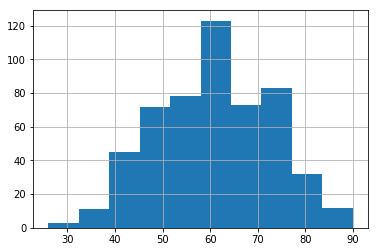

In [19]:
patient['Diagnosis Age'].hist()

In [20]:
patient.groupby(['Informed consent verified']).size()

Informed consent verified
NO       3
YES    529
dtype: int64

In [21]:
patient.groupby(['Neoplasm Histologic Grade']).size()

Neoplasm Histologic Grade
G1     14
G2    229
G3    205
G4     76
GX      5
dtype: int64

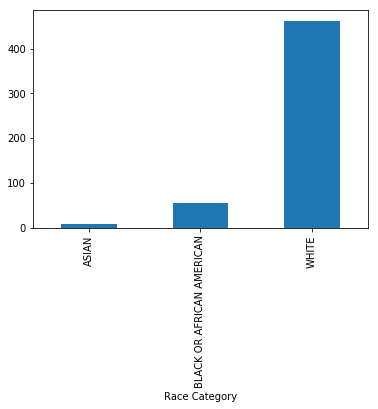

In [22]:
patient.groupby(['Race Category']).size()
patient.groupby(['Race Category']).size().plot(kind='bar')

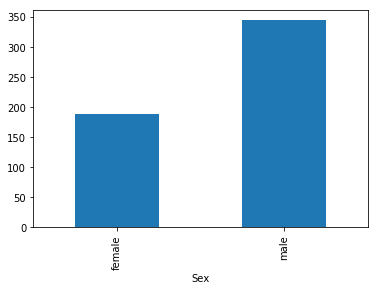

In [23]:
patient.groupby(['Sex']).size().plot(kind='bar')

In [24]:
pd.crosstab(patient['Overall Survival Status'],patient['Patient\'s Vital Status'])

Patient's Vital Status,Alive,Dead
Overall Survival Status,,
DECEASED,0,172
LIVING,357,0


In [25]:
patient[['Overall Survival Status','Patient\'s Vital Status']].isnull().sum()

track_name
Overall Survival Status    0
Patient's Vital Status     3
dtype: int64

In [26]:
patient = patient.drop(['Patient\'s Vital Status'],axis=1)

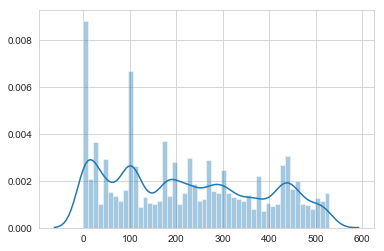

In [27]:
count = patient['Mutation Count']
mutation = []
for i in range(len(count)):
    mutation = mutation + [i] * count[i]
mutation = pd.Series(mutation)

sns.set_style('whitegrid')
sns.distplot(mutation,bins=50)

In [28]:
patient_data = patient
patient_data = patient_data.drop(['# Samples per Patient','Cancer Type','Informed consent verified','Neoplasm Histologic Type Name'],axis=1)

In [29]:
patient_data = patient_data.drop(['American Joint Committee on Cancer Tumor Stage Code'],axis=1)

In [30]:
patient_data

track_name,ID,Diagnosis Age,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage
0,CG-A3-3387,49,20.27,G2,WHITE,LIVING,male,70,T1
1,CG-A3-3374,51,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1
2,CG-A3-3363,50,10.48,G2,ASIAN,LIVING,male,1392,T2
3,CG-CZ-5460,55,94.38,G2,WHITE,LIVING,male,52,T3
4,CG-BP-4176,64,64.22,G2,WHITE,LIVING,male,85,T1
5,CG-CJ-6032,63,119.55,G3,WHITE,LIVING,female,42,T2
6,CG-BP-5192,59,23.46,G2,WHITE,LIVING,male,46,T1
7,CG-CW-5585,51,85.71,G2,WHITE,LIVING,male,41,T3
8,CG-B0-5691,66,112.71,G3,WHITE,LIVING,female,55,T1
9,CG-AK-3453,58,83.15,G2,WHITE,LIVING,female,350,T2


In [31]:
patient_data.nunique()

track_name
ID                           532
Diagnosis Age                 59
Overall Survival (Months)    479
Neoplasm Histologic Grade      5
Race Category                  3
Overall Survival Status        2
Sex                            2
Mutation Count               116
Stage                          4
dtype: int64

In [32]:
patient_data.isnull().sum()

track_name
ID                           0
Diagnosis Age                0
Overall Survival (Months)    0
Neoplasm Histologic Grade    3
Race Category                7
Overall Survival Status      0
Sex                          0
Mutation Count               0
Stage                        0
dtype: int64

In [33]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 9 columns):
ID                           532 non-null object
Diagnosis Age                532 non-null int64
Overall Survival (Months)    532 non-null float64
Neoplasm Histologic Grade    529 non-null object
Race Category                525 non-null object
Overall Survival Status      532 non-null object
Sex                          532 non-null object
Mutation Count               532 non-null int64
Stage                        532 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 37.5+ KB


In [118]:
id1 = patient.ID.sort_values()
id2 = mrna.SAMPLE_ID.sort_values()

print(id1.head(),id2.head())

470    CG-3Z-A93Z
231    CG-6D-AA2E
366    CG-A3-3306
158    CG-A3-3307
46     CG-A3-3308
Name: ID, dtype: object 102    CG-3Z-A93Z
103    CG-6D-AA2E
52     CG-A3-3306
53     CG-A3-3307
54     CG-A3-3308
Name: SAMPLE_ID, dtype: object


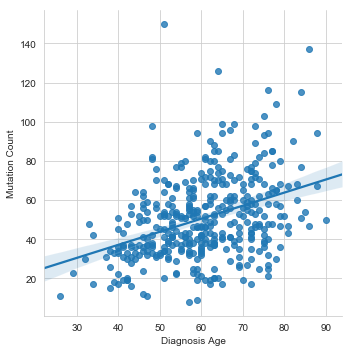

In [58]:
sns.lmplot(y='Mutation Count', x="Diagnosis Age", data=pd_mutation)

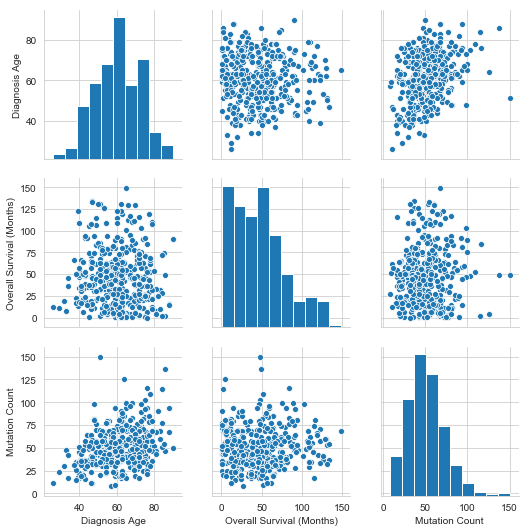

In [48]:
sns.pairplot(pd_mutation)

In [60]:
mrna = pd.read_csv('mrna_data.txt',sep='\t')
seq = pd.read_csv('seq_data.txt',sep='\t')

In [175]:
mrna

,SAMPLE_ID,CASR,BEX1,MYH8,SPON1,FABP4,SLITRK5,CBLN2,DGKK,RGS7,...,NMRK2,GAL3ST3,MYMK,PLPPR5,GALNT9,UBE2QL1,KCNK3,PCDHB1,CXADRP3,LRRTM3
0,CG-B0-5698,-0.1846,1.0774,-0.3371,-0.6924,-0.3928,-0.5263,-0.3020,-0.6173,-0.2393,...,-0.0834,-0.1869,-0.2581,-0.6176,-0.0645,-0.3750,-0.5969,-0.3519,-0.4425,-0.4822
1,CG-B0-5710,-0.2960,-0.3945,-0.3371,-0.6209,0.0998,-0.5013,4.2649,0.4548,0.8915,...,-0.0834,-0.1871,-0.2581,-0.3625,-0.0210,-0.2683,-0.6789,-0.2261,-0.0349,-0.4822
2,CG-B0-5711,-0.3062,-0.1172,-0.3371,0.2032,-0.2344,0.1684,0.0164,1.8246,-0.3062,...,-0.0832,-0.2120,-0.2581,-0.6835,-0.5904,-0.3993,-0.6913,0.0778,0.2538,-0.4822
3,CG-B0-5712,-0.3270,-0.1590,-0.3371,-0.6963,-0.1938,1.2913,-0.3020,-0.6173,8.6926,...,-0.0834,-0.1141,1.5261,-0.7062,-0.3973,-0.3390,-0.5780,-0.3519,-0.4425,-0.4822
4,CG-B0-5713,-0.3130,-0.3992,-0.3371,1.2810,0.9452,-0.1218,-0.2530,-0.6173,-0.3062,...,-0.0834,-0.1705,0.1368,-0.4372,0.2065,-0.2368,0.2235,-0.2526,-0.1206,-0.4822
5,CG-B0-5812,-0.0254,-0.1380,-0.3260,-0.4054,-0.1662,-0.2291,3.2626,0.7966,-0.2249,...,-0.0834,-0.1445,0.1376,-0.6813,-0.7237,-0.1103,-0.8302,-0.1528,0.5252,0.4956
6,CG-B4-5832,-0.3270,-0.3911,-0.3371,-0.6799,-0.4235,-0.3070,-0.3020,-0.0007,-0.3015,...,-0.0834,-0.2306,-0.2581,0.5778,-0.7788,-0.3882,0.1779,-0.3519,0.2608,1.1170
7,CG-B4-5834,-0.1277,2.8900,-0.2344,0.5248,-0.3715,-0.2042,0.0706,-0.3494,-0.3062,...,-0.0834,-0.1164,-0.2581,-0.4029,0.2983,-0.1067,-0.7140,1.1564,0.4741,-0.0190
8,CG-B4-5835,-0.1922,-0.1898,-0.3362,2.2219,-0.4200,-0.5815,-0.2793,-0.0932,-0.2879,...,0.2981,-0.1508,-0.2581,-0.1935,-0.7885,-0.4075,-0.9148,0.7546,-0.4425,-0.4822
9,CG-B4-5836,0.2401,-0.3954,-0.3361,1.7731,0.1810,1.1338,-0.2395,0.2454,-0.2772,...,-0.0834,-0.1693,-0.2581,1.1999,-0.2783,0.0217,0.6443,-0.3519,-0.4425,-0.4822


In [113]:
def remove(x):
    new = x[:len(x)-3]
    return new
mrna['SAMPLE_ID'] = mrna['SAMPLE_ID'].apply(lambda x: remove(x))




In [172]:
mrna

,SAMPLE_ID,CASR,BEX1,MYH8,SPON1,FABP4,SLITRK5,CBLN2,DGKK,RGS7,...,NMRK2,GAL3ST3,MYMK,PLPPR5,GALNT9,UBE2QL1,KCNK3,PCDHB1,CXADRP3,LRRTM3
0,CG-B0-5698,-0.1846,1.0774,-0.3371,-0.6924,-0.3928,-0.5263,-0.3020,-0.6173,-0.2393,...,-0.0834,-0.1869,-0.2581,-0.6176,-0.0645,-0.3750,-0.5969,-0.3519,-0.4425,-0.4822
1,CG-B0-5710,-0.2960,-0.3945,-0.3371,-0.6209,0.0998,-0.5013,4.2649,0.4548,0.8915,...,-0.0834,-0.1871,-0.2581,-0.3625,-0.0210,-0.2683,-0.6789,-0.2261,-0.0349,-0.4822
2,CG-B0-5711,-0.3062,-0.1172,-0.3371,0.2032,-0.2344,0.1684,0.0164,1.8246,-0.3062,...,-0.0832,-0.2120,-0.2581,-0.6835,-0.5904,-0.3993,-0.6913,0.0778,0.2538,-0.4822
3,CG-B0-5712,-0.3270,-0.1590,-0.3371,-0.6963,-0.1938,1.2913,-0.3020,-0.6173,8.6926,...,-0.0834,-0.1141,1.5261,-0.7062,-0.3973,-0.3390,-0.5780,-0.3519,-0.4425,-0.4822
4,CG-B0-5713,-0.3130,-0.3992,-0.3371,1.2810,0.9452,-0.1218,-0.2530,-0.6173,-0.3062,...,-0.0834,-0.1705,0.1368,-0.4372,0.2065,-0.2368,0.2235,-0.2526,-0.1206,-0.4822
5,CG-B0-5812,-0.0254,-0.1380,-0.3260,-0.4054,-0.1662,-0.2291,3.2626,0.7966,-0.2249,...,-0.0834,-0.1445,0.1376,-0.6813,-0.7237,-0.1103,-0.8302,-0.1528,0.5252,0.4956
6,CG-B4-5832,-0.3270,-0.3911,-0.3371,-0.6799,-0.4235,-0.3070,-0.3020,-0.0007,-0.3015,...,-0.0834,-0.2306,-0.2581,0.5778,-0.7788,-0.3882,0.1779,-0.3519,0.2608,1.1170
7,CG-B4-5834,-0.1277,2.8900,-0.2344,0.5248,-0.3715,-0.2042,0.0706,-0.3494,-0.3062,...,-0.0834,-0.1164,-0.2581,-0.4029,0.2983,-0.1067,-0.7140,1.1564,0.4741,-0.0190
8,CG-B4-5835,-0.1922,-0.1898,-0.3362,2.2219,-0.4200,-0.5815,-0.2793,-0.0932,-0.2879,...,0.2981,-0.1508,-0.2581,-0.1935,-0.7885,-0.4075,-0.9148,0.7546,-0.4425,-0.4822
9,CG-B4-5836,0.2401,-0.3954,-0.3361,1.7731,0.1810,1.1338,-0.2395,0.2454,-0.2772,...,-0.0834,-0.1693,-0.2581,1.1999,-0.2783,0.0217,0.6443,-0.3519,-0.4425,-0.4822


In [198]:
def pysqldf(q):
    return sqldf(q, globals())

q = '''
SELECT *
FROM patient
JOIN mrna
ON patient.ID = mrna.SAMPLE_ID
'''
df = pysqldf(q)


In [199]:
df

,ID,American Joint Committee on Cancer Tumor Stage Code,Diagnosis Age,Overall Survival (Months),Neoplasm Histologic Grade,Race Category,Overall Survival Status,Sex,Mutation Count,Stage,...,NMRK2,GAL3ST3,MYMK,PLPPR5,GALNT9,UBE2QL1,KCNK3,PCDHB1,CXADRP3,LRRTM3
0,CG-A3-3387,T1a,49,20.27,G2,WHITE,LIVING,male,70,T1,...,-0.0830,-0.1707,-0.2581,0.2143,-0.7927,-0.3291,-0.2567,-0.1539,-0.1217,0.0041
1,CG-A3-3374,T1b,51,43.17,G2,BLACK OR AFRICAN AMERICAN,LIVING,female,934,T1,...,-0.0274,-0.2045,-0.2581,-0.7088,-0.7921,1.3842,-0.9107,-0.3519,-0.4425,-0.4822
2,CG-A3-3363,T2,50,10.48,G2,ASIAN,LIVING,male,1392,T2,...,-0.0830,-0.0711,-0.2581,2.3981,-0.1062,-0.4213,-0.9130,0.6727,0.8858,-0.4822
3,CG-CZ-5460,T3b,55,94.38,G2,WHITE,LIVING,male,52,T3,...,-0.0834,-0.2214,-0.2581,0.3389,-0.7828,-0.3776,-0.3862,-0.3519,-0.0984,-0.4822
4,CG-BP-4176,T1b,64,64.22,G2,WHITE,LIVING,male,85,T1,...,-0.0831,-0.2204,-0.2581,1.6625,-0.5232,-0.2374,-0.6744,-0.3519,0.7024,-0.4822
5,CG-CJ-6032,T2,63,119.55,G3,WHITE,LIVING,female,42,T2,...,-0.0834,-0.0367,-0.2581,2.0796,2.8367,-0.0034,2.6966,-0.3519,-0.4425,-0.4822
6,CG-BP-5192,T1a,59,23.46,G2,WHITE,LIVING,male,46,T1,...,-0.0833,-0.1788,2.1204,-0.7067,1.8769,0.0741,0.5387,-0.3519,-0.1193,-0.4822
7,CG-CW-5585,T3b,51,85.71,G2,WHITE,LIVING,male,41,T3,...,-0.0834,-0.2157,0.4244,-0.2330,-0.1921,-0.1149,-0.6306,5.4844,-0.1644,0.9936
8,CG-B0-5691,T1a,66,112.71,G3,WHITE,LIVING,female,55,T1,...,-0.0805,0.4493,1.7371,-0.0836,0.0447,-0.2206,-0.7109,-0.0173,-0.4425,1.1613
9,CG-AK-3453,T2,58,83.15,G2,WHITE,LIVING,female,350,T2,...,-0.0766,0.0422,0.1464,-0.7109,-0.7739,-0.3746,-0.9265,1.8864,-0.1127,33.0062


/Users/yuchen/anaconda3/envs/ds_pack/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [178]:
def pysqldf(q):
    return sqldf(q, globals())

q = '''
SELECT *
FROM patient
ORDER BY ID
'''
pat = pysqldf(q)

q = '''
SELECT *
FROM mrna
ORDER BY SAMPLE_ID
'''
rna = pysqldf(q)

In [179]:
pat['id'] = rna['SAMPLE_ID']

In [180]:
id_data = pat[['ID','id']]

In [183]:
id_data[id_data.ID != id_data.id]

,ID,id
207,CG-B8-4143,CG-BP-4158
208,CG-B8-4146,CG-BP-4159
209,CG-B8-4148,CG-BP-4160
210,CG-B8-4151,CG-BP-4161
211,CG-B8-4153,CG-BP-4162
212,CG-B8-4154,CG-BP-4163
213,CG-B8-4619,CG-BP-4164
214,CG-B8-4620,CG-BP-4165
215,CG-B8-4621,CG-BP-4166
216,CG-B8-4622,CG-BP-4167


In [186]:
test = id_data.loc[380,"id"]

In [188]:
test.replace("_","")

'CG-B8-A7U6'

In [190]:
test

'CG-B_8-A7U6'

In [168]:
ids = id_data[206:].T.to_csv ('id_data.csv')

In [150]:
id_data

In [161]:
patient['ID'] = patient['ID'].str.upper()
mrna['SAMPLE_ID'] = mrna['SAMPLE_ID'].str.upper()

In [162]:
mrna.drop(['ID'],axis=1)

,SAMPLE_ID,CASR,BEX1,MYH8,SPON1,FABP4,SLITRK5,CBLN2,DGKK,RGS7,...,NMRK2,GAL3ST3,MYMK,PLPPR5,GALNT9,UBE2QL1,KCNK3,PCDHB1,CXADRP3,LRRTM3
0,CG-B0-5698,-0.1846,1.0774,-0.3371,-0.6924,-0.3928,-0.5263,-0.3020,-0.6173,-0.2393,...,-0.0834,-0.1869,-0.2581,-0.6176,-0.0645,-0.3750,-0.5969,-0.3519,-0.4425,-0.4822
1,CG-B0-5710,-0.2960,-0.3945,-0.3371,-0.6209,0.0998,-0.5013,4.2649,0.4548,0.8915,...,-0.0834,-0.1871,-0.2581,-0.3625,-0.0210,-0.2683,-0.6789,-0.2261,-0.0349,-0.4822
2,CG-B0-5711,-0.3062,-0.1172,-0.3371,0.2032,-0.2344,0.1684,0.0164,1.8246,-0.3062,...,-0.0832,-0.2120,-0.2581,-0.6835,-0.5904,-0.3993,-0.6913,0.0778,0.2538,-0.4822
3,CG-B0-5712,-0.3270,-0.1590,-0.3371,-0.6963,-0.1938,1.2913,-0.3020,-0.6173,8.6926,...,-0.0834,-0.1141,1.5261,-0.7062,-0.3973,-0.3390,-0.5780,-0.3519,-0.4425,-0.4822
4,CG-B0-5713,-0.3130,-0.3992,-0.3371,1.2810,0.9452,-0.1218,-0.2530,-0.6173,-0.3062,...,-0.0834,-0.1705,0.1368,-0.4372,0.2065,-0.2368,0.2235,-0.2526,-0.1206,-0.4822
5,CG-B0-5812,-0.0254,-0.1380,-0.3260,-0.4054,-0.1662,-0.2291,3.2626,0.7966,-0.2249,...,-0.0834,-0.1445,0.1376,-0.6813,-0.7237,-0.1103,-0.8302,-0.1528,0.5252,0.4956
6,CG-B4-5832,-0.3270,-0.3911,-0.3371,-0.6799,-0.4235,-0.3070,-0.3020,-0.0007,-0.3015,...,-0.0834,-0.2306,-0.2581,0.5778,-0.7788,-0.3882,0.1779,-0.3519,0.2608,1.1170
7,CG-B4-5834,-0.1277,2.8900,-0.2344,0.5248,-0.3715,-0.2042,0.0706,-0.3494,-0.3062,...,-0.0834,-0.1164,-0.2581,-0.4029,0.2983,-0.1067,-0.7140,1.1564,0.4741,-0.0190
8,CG-B4-5835,-0.1922,-0.1898,-0.3362,2.2219,-0.4200,-0.5815,-0.2793,-0.0932,-0.2879,...,0.2981,-0.1508,-0.2581,-0.1935,-0.7885,-0.4075,-0.9148,0.7546,-0.4425,-0.4822
9,CG-B4-5836,0.2401,-0.3954,-0.3361,1.7731,0.1810,1.1338,-0.2395,0.2454,-0.2772,...,-0.0834,-0.1693,-0.2581,1.1999,-0.2783,0.0217,0.6443,-0.3519,-0.4425,-0.4822


In [163]:
def remove(x):
    new = x[:len(x)-3]
    new.replace('_',"")
    return new
mrna['SAMPLE_ID'] = mrna['SAMPLE_ID'].apply(lambda x: remove(x))